# Working with Dates and Time

### Load required Tidyverse packages

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



### Using "lubridate" package
- Transform strings into Dates and Time as long as it follows the format: 
- year, month, day
- hour, minute

In [2]:
ymd("2006-03-12")
ymd(" '06 March 12")
ymd_hm("06/3/12 6:30pm")

[1] "2006-03-12"

[1] "2006-03-12"

[1] "2006-03-12 18:30:00 UTC"

### Read in Hurricane Data that was saved as a csv file from a flat file online

In [3]:
hurricane <- read_csv("Data/hurricane_data.csv")
hurricane[1:5, 1:10]

Parsed with column specification:
cols(
  .default = col_integer(),
  storm_id = col_character(),
  storm_name = col_character(),
  month = col_character(),
  day = col_character(),
  hour = col_character(),
  latitude = col_double(),
  longitude = col_double(),
  storm_type = col_character(),
  final = col_character()
)
See spec(...) for full column specifications.


storm_id,storm_name,month,day,hour,year,latitude,longitude,max_wind,min_pressure
AL0188,ALBERTO,08,05,18,1988,32.0,77.5,20,1015
AL0188,ALBERTO,08,06,00,1988,32.8,76.2,20,1014
AL0188,ALBERTO,08,06,06,1988,34.0,75.2,20,1013
AL0188,ALBERTO,08,06,12,1988,35.2,74.6,25,1012
AL0188,ALBERTO,08,06,18,1988,37.0,73.5,25,1011


### Transform the date and time to a date-time class
- Subset data from "hurricane" dataset
- Use unite() function from "tidyr" package to combine all dates columns into one datetime variable

In [4]:
hurricane %>%
  filter(storm_name == "ANDREW" & year == "1992") %>%
  select(year, month, day, hour, max_wind, min_pressure) %>%
  unite(datetime, year, month, day, hour) %>%
  sample_n(5)

datetime,max_wind,min_pressure
1992_08_19_00,45,1001
1992_08_22_06,65,994
1992_08_21_18,50,1004
1992_08_23_00,110,961
1992_08_27_18,25,999


### Use mutate() function to convert datetime into date-time class
- With datetime class it is easier to plot using ggplot2

In [5]:
andrew <- hurricane %>%
  filter(storm_name == "ANDREW" & year == "1992") %>%
  select(year, month, day, hour, max_wind, min_pressure) %>%
  unite(datetime, year, month, day, hour) %>%
  mutate(datetime = ymd_h(datetime))

head(andrew)

datetime,max_wind,min_pressure
1992-08-16 18:00:00,25,1010
1992-08-17 00:00:00,30,1009
1992-08-17 06:00:00,30,1008
1992-08-17 12:00:00,35,1006
1992-08-17 18:00:00,35,1003
1992-08-18 00:00:00,40,1002


<hr>

# Pulling out Date and Time elements
- Using year(), months(), mday(), wday(), yday(), weekdays(), hour(), minute(), and second() functions

### Use datetime column to add new columns for the year, month, weekday, year day, and hour of each observation
- Recreating the original dataset (with additional info)

In [6]:
andrew %>%
  select(datetime) %>%
  mutate(year = year(datetime),
         month = months(datetime),
         weekday = weekdays(datetime),
         year_day = yday(datetime),
         hour = hour(datetime)) %>%
  sample_n(10)

datetime,year,month,weekday,year_day,hour
1992-08-21 18:00:00,1992,August,Friday,234,18
1992-08-21 12:00:00,1992,August,Friday,234,12
1992-08-19 00:00:00,1992,August,Wednesday,232,0
1992-08-21 06:00:00,1992,August,Friday,234,6
1992-08-24 06:00:00,1992,August,Monday,237,6
1992-08-25 06:00:00,1992,August,Tuesday,238,6
1992-08-27 12:00:00,1992,August,Thursday,240,12
1992-08-27 18:00:00,1992,August,Thursday,240,18
1992-08-18 18:00:00,1992,August,Tuesday,231,18
1992-08-22 00:00:00,1992,August,Saturday,235,0


### Using ggplot2, look at patterns in max_wind by weeksday and month
- Using dplyr, tidyr, lubridate, and ggplot2 packages:
- After creating weekday and month varibales, set them to be factors with levels for accurate display when plotting

In [7]:
patterns <- hurricane %>%
  select(month, day, hour, year, max_wind) %>%
  unite(datetime, year, month, day, hour) %>%
  mutate(datetime = ymd_h(datetime),
         weekday = weekdays(datetime),
         weekday = factor(weekday, levels = c("Sunday", "Monday", "Tuesday", "Wednesday", 
                                              "Thursday", "Friday", "Saturday")),
         month = months(datetime),
         month = factor(month, levels = c("January", "Februrary", "March", "April", "May", "June", 
                                          "July", "August", "September", "October", "November", "December")))

patterns %>% sample_n(10)

datetime,max_wind,weekday,month
2007-05-06 12:00:00,35,Sunday,May
2001-11-29 00:00:00,65,Thursday,November
1995-09-02 12:00:00,30,Saturday,September
1988-10-19 00:00:00,90,Wednesday,October
2002-09-23 06:00:00,40,Monday,September
2003-04-18 12:00:00,30,Friday,April
2004-08-27 18:00:00,100,Friday,August
1992-08-27 06:00:00,30,Thursday,August
1994-09-25 12:00:00,25,Sunday,September
2005-09-09 06:00:00,55,Friday,September


### Plot using ggplot2 to check patterns for weekdays and for months

#### Weekday Patterns:

In [8]:
pattern_weekdays <- patterns %>%
  group_by(weekday) %>%
  summarize(ave_max_wind = mean(max_wind)) %>%
  rename(grouping = weekday)
  
pattern_weekdays

grouping,ave_max_wind
Sunday,50.29326
Monday,49.92836
Tuesday,49.14007
Wednesday,49.35329
Thursday,50.93357
Friday,49.95330
Saturday,50.17373


#### Monthly Patterns:


In [9]:
pattern_months <- patterns %>%
  group_by(month) %>%
  summarize(ave_max_wind = mean(max_wind)) %>%
  rename(grouping = month)

pattern_months

grouping,ave_max_wind
January,41.96429
April,37.07547
May,36.06195
June,35.26786
July,42.79981
August,49.39716
September,54.85795
October,49.60255
November,47.78761
December,42.17514


### Plot with ggplot2
- Use grid.arrange() function from "gridExtra" packageTo arrange different ggplot objects in the same plot
- Use %+% function to reuse the code for both graphs, substituting only the data frame

In [10]:
library(gridExtra)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [11]:
a <- ggplot(pattern_weekdays, 
            aes(x = grouping, y = ave_max_wind)) + 
            geom_bar(stat = "identity") +
            xlab("")

In [12]:
b <- a %+% pattern_months

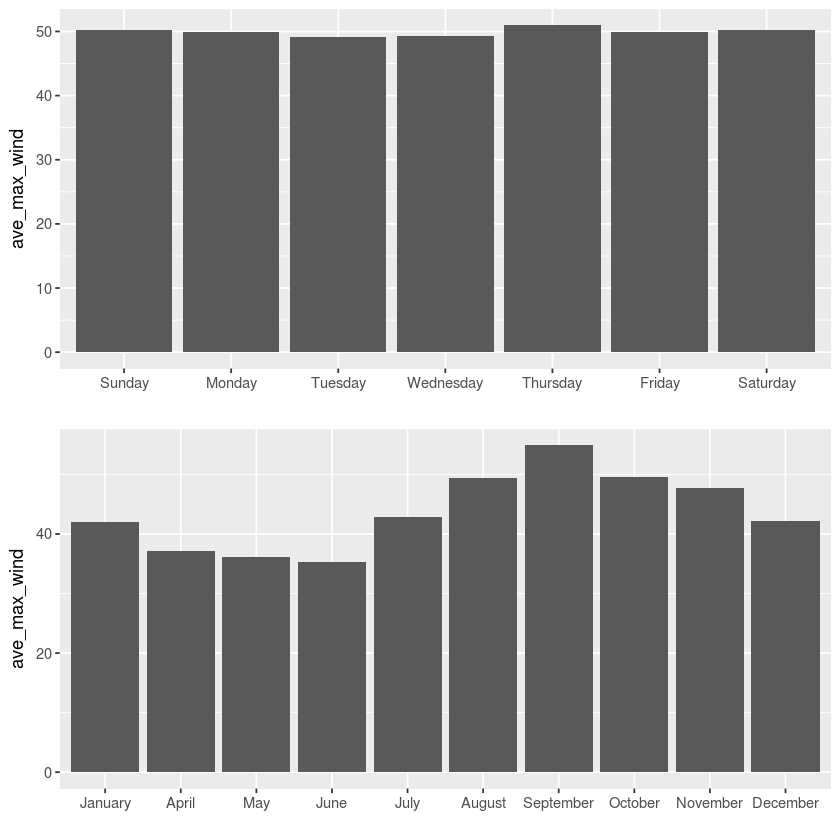

In [13]:
grid.arrange(a, b, ncol=1)

#### Analysis:
- No pattern in storm intensity by day
- But there is pattern when looking by months, highest average wind speed is in September